# Titanic: Machine Learning from Disaster 

In [105]:
# import some libraries to be used in this code 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import boxcox
from sklearn.model_selection import StratifiedKFold

In [106]:
# load training data
train =  pd.read_csv('train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# load test data
test =  pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Variables in dataset:

PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

Sex: Passenger's sex. It's either Male or Female.

Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

SibSp: Number of siblings or spouses travelling with each passenger.

Parch: Number of parents of children travelling with each passenger.

Ticket: Ticket number.

Fare: How much money the passenger has paid for the travel journey.

Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

Embarked: Port from where the particular passenger was embarked/boarded.

In [108]:
train.shape

(891, 12)

In [109]:
test.shape

(418, 11)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [112]:
# check the null values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
# check the null values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Removing Outliers from data

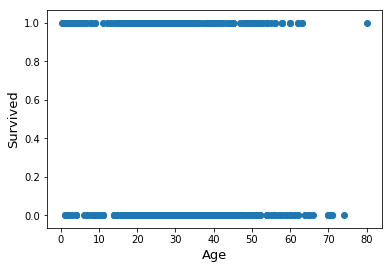

In [114]:
# Let's remove outliers from Age first, for that we will plot scatter plot 
fig,ax = plt.subplots()
ax.scatter(x=train['Age'],y=train['Survived'])
plt.ylabel('Survived',fontsize=13)
plt.xlabel('Age',fontsize=13)
plt.show()

In [115]:
# remove outliers from Age 
train = train.drop(train[(train['Age']>79) & (train['Survived']>0.8) ].index)

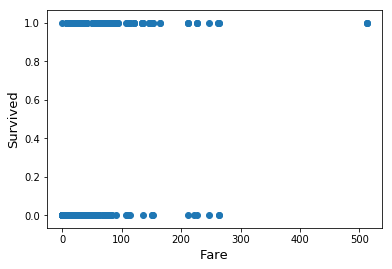

In [116]:
# Now let's remove outliers from Fare, again we will check through scatter plot for outliers
fig,ax = plt.subplots()
ax.scatter(x=train['Fare'], y=train['Survived'])
plt.ylabel('Survived',fontsize=13)
plt.xlabel('Fare',fontsize=13)
plt.show()

In [117]:
# drop outliers in fare
train = train.drop(train[(train['Fare']>400)].index)

In [118]:
# let's concatenate both train and test data in one dataframe
target = train['Survived']
whole_df = pd.concat([train,test],keys=[0,1],sort=False)

### Working with Missing Values

Text(0.5,1,'Dataset')

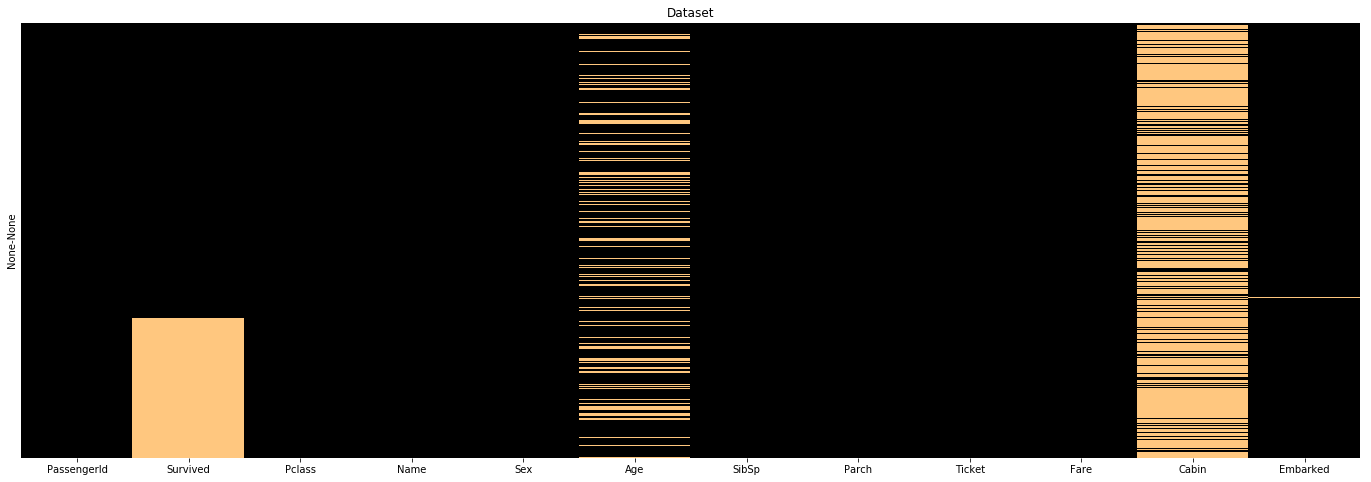

In [119]:
# let's draw heatmap to get idea about missing values in each column 
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(24,8))
sns.heatmap(whole_df.isnull(),yticklabels=False,ax=ax,cbar=False,cmap='copper')
ax.set_title('Dataset')

In [120]:
# now we will explore features and then later fill the missing data 

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


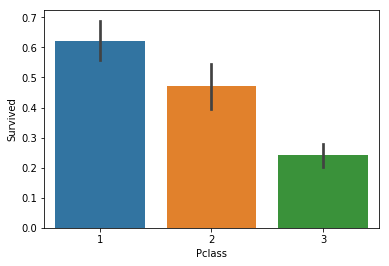

In [121]:
# plot barplot between Pclass & Survived
sns.barplot(x='Pclass',y='Survived',data=whole_df)

The above plot shows that there is a negative correlation between the label and Pclass

In [122]:
whole_df[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.332577
Survived,-0.332577,1.000000


C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


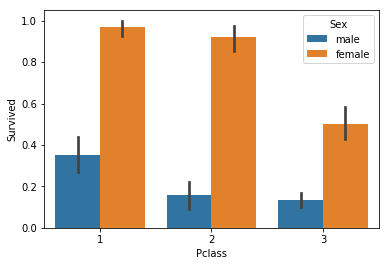

In [123]:
sns.barplot(x='Pclass',y='Survived',hue="Sex",data=whole_df,order=None)

From above, women has higher chance of survival than men in each class

In [124]:
# we have few missing enteries of the Fare price in test data,so we can fill it with the average price depending on the class
whole_df['Fare'].fillna(whole_df[whole_df['Pclass']==3]['Fare'].mean(),inplace=True)

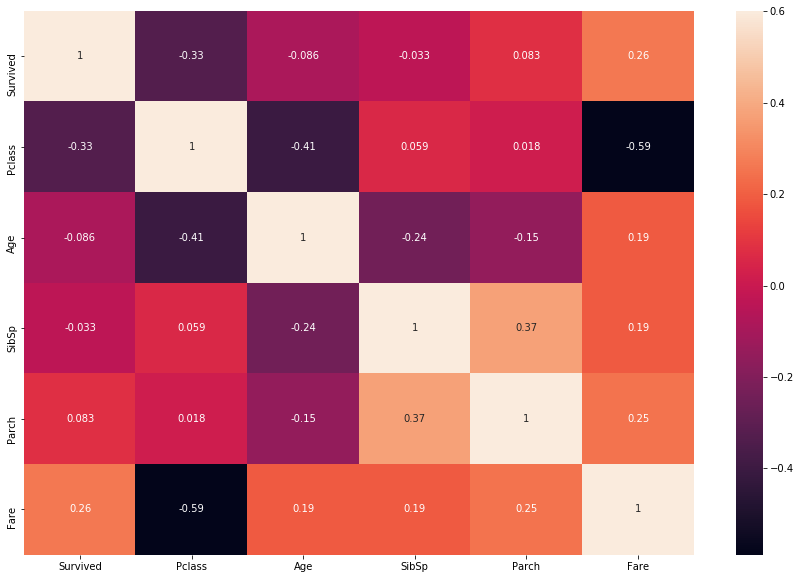

In [125]:
# draw heatmap for correlation of different features 
plt.figure(figsize=(15,10))
sns.heatmap(whole_df.drop('PassengerId',axis=1).corr(),vmax=0.6,annot=True)

Most correlated featurs from above chart are Pclass, SibSp, Parch and Fare

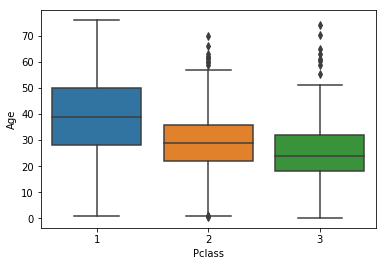

In [126]:
# draw boxplot between Age & Pclass
sns.boxplot(data=whole_df,y='Age',x='Pclass')

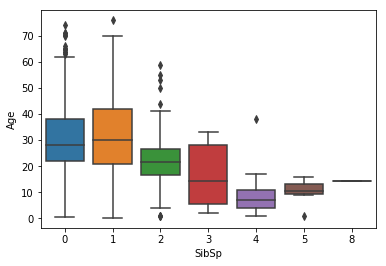

In [127]:
# draw boxplot between Age & SibSp
sns.boxplot(data=whole_df,y='Age',x='SibSp')

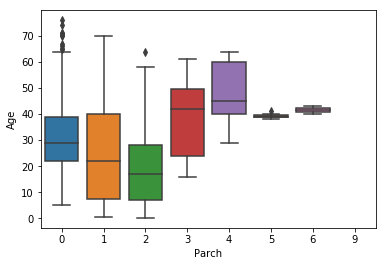

In [128]:
sns.boxplot(data=whole_df,y='Age',x='Parch')

We will fill age by looking at the average age of people in the same class and have the same number of Siblings/Spouse and Parentch\children

In [129]:
# define function to fill the missing Age values 
# We will fill age by looking at the average age of people in the same class and have the same number of Siblings/Spouse and Parentch\children 
def adjust_age(df,age_s):
    age_array = age_s.to_numpy()
    result=[]
    
    default = int(df['Age'].median())
    for i,val in enumerate(age_array):
        # if empty value
        if np.isnan(val):
            median_age = df[(df['Pclass']==df.iloc[i]['Pclass'])&(df['SibSp']==df.iloc[i]['SibSp'])&(df['Parch']==df.iloc[i]['Parch'])].median()
            try:
                result.append(int(median_age))
            except:
                result.append(default)
        else:
            result.append(int(val))
    return result

whole_df['Age']=adjust_age(whole_df,whole_df['Age'])

AttributeError: 'Series' object has no attribute 'to_numpy'

In [ ]:
# now we will recheck our heatmap, all Age missing values should be filled
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,6))
sns.heatmap(whole_df.isnull(),yticklabels=False,ax=ax,cbar=False,cmap='copper')
ax.set_title('Whole dataset')

No more missing values in Age,Now try to fill Cabin missing values  

In [130]:
# for this we have large amount of missing data, we will replace with NA
whole_df['Cabin'].fillna(value="NA",inplace=True)

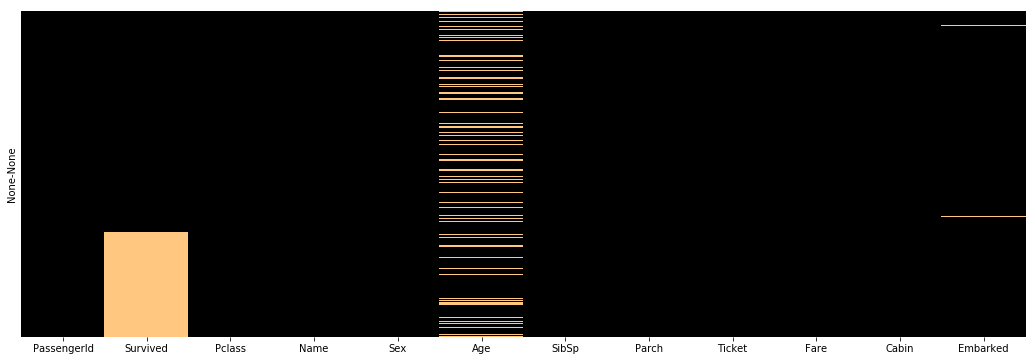

In [131]:
fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(18,6))
sns.heatmap(whole_df.isnull(),yticklabels=False,ax=ax,cbar=False,cmap="copper")

In [132]:
whole_df['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

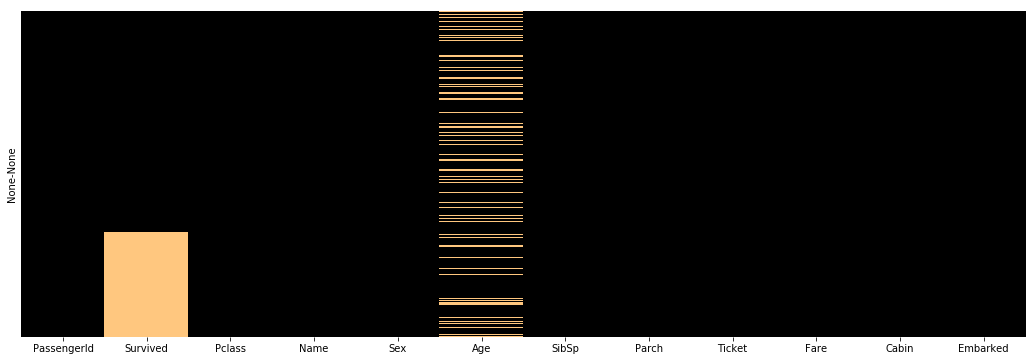

In [133]:
fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(18,6))
sns.heatmap(whole_df.isnull(),yticklabels=False,ax=ax,cbar=False,cmap="copper")

### Feature Engineering

#### Fare, Age, Parch & SibSp

In [134]:
# Converting the continuos range to categorical thru binning
whole_df['Fare']=pd.qcut(whole_df['Fare'],13)

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


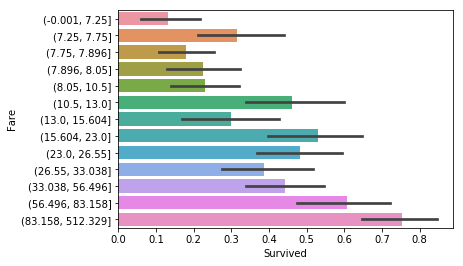

In [135]:
sns.barplot(data=whole_df,x='Survived', y='Fare')

This plot shows that there exists higher probability for survival for more fare

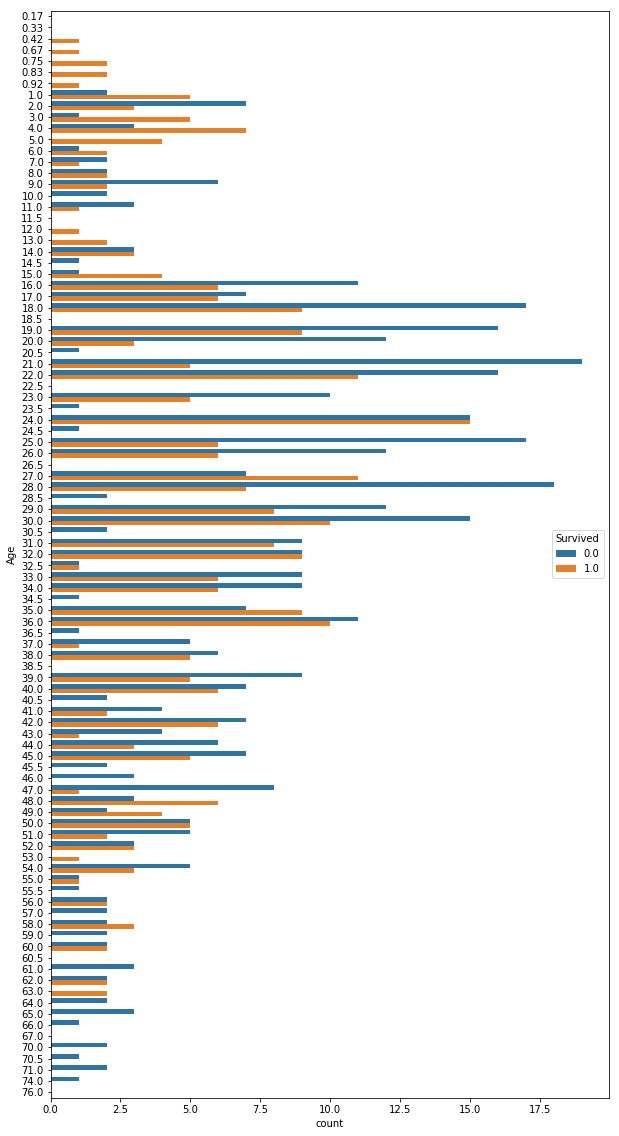

In [136]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,20))
sns.countplot(data=whole_df,y='Age',hue='Survived',ax=ax)

In [137]:
# let's categorize age into different age groups for better countplot
def categorize_age(val):
    if val<1:
        return "infant"
    if val>=1 and val <=14:
        return "child"
    elif val >=15 and val<=24:
        return "adult"
    elif val >=64:
        return "senior"


In [138]:
whole_df['Age']=whole_df['Age'].apply(categorize_age)

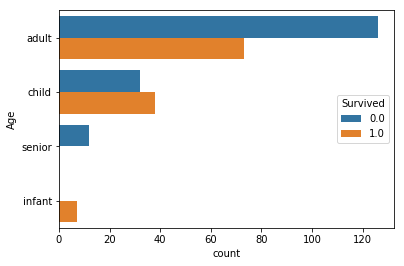

In [139]:
sns.countplot(data=whole_df, y='Age', hue ='Survived')

Above plot suggests that all infants survived while others have less chance of survival

In [140]:
whole_df['famsize'] = whole_df['Parch']+whole_df['SibSp']+1

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


2.8485226731871713

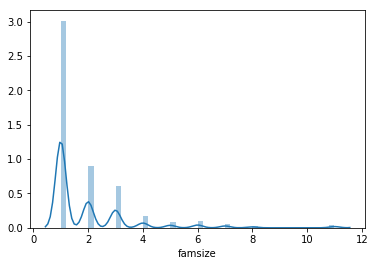

In [141]:
sns.distplot(whole_df['famsize'])
whole_df['famsize'].skew()

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


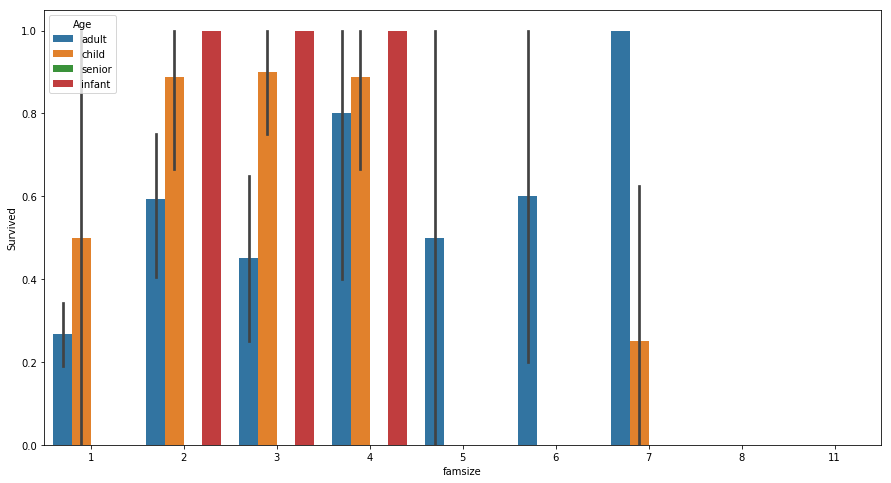

In [142]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.barplot(data=whole_df, y='Survived', x='famsize', hue='Age',ax=ax)

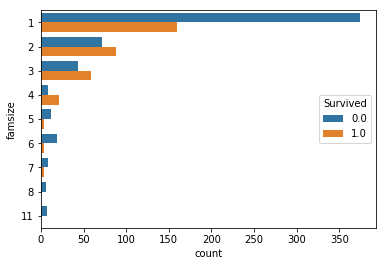

In [143]:
sns.countplot(data=whole_df, y='famsize', hue='Survived')

In [144]:
# let's change famsize feature to categorical by grouping sizes which have similar survival rates
def classify_fam_size(famsize):
    if famsize==1:
        return "solo"
    elif famsize in [2,3,4]:
        return "small-family"
    elif famsize in [5,6]:
        return "mid-family"
    elif famsize in [5,6]:
        return "mid-family"
    elif famsize>6:
        return "large_family"
    
whole_df['famsize'] = whole_df['famsize'].apply(classify_fam_size)

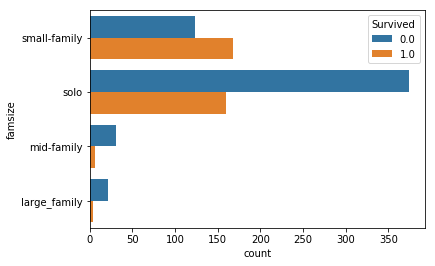

In [145]:
sns.countplot(data=whole_df,y='famsize',hue='Survived')

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


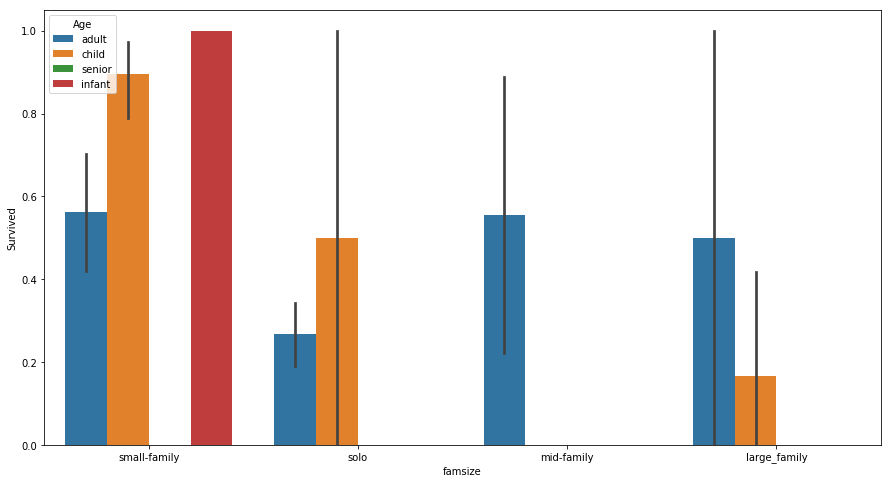

In [146]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.barplot(data=whole_df, y='Survived', x='famsize', hue='Age',ax=ax)

#### Cabin, Names & Tickets

In [147]:
whole_df['Cabin'].unique()

array(['NA', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C45',

In [148]:
# grouping values in cabin by their first letter
def take_section(code):
    return code[0]
whole_df['Cabin']=whole_df['Cabin'].apply(take_section)

In [149]:
whole_df['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

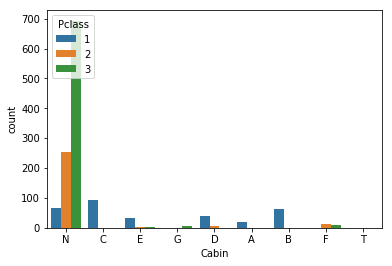

In [150]:
sns.countplot(data=whole_df, x= 'Cabin',hue='Pclass')

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


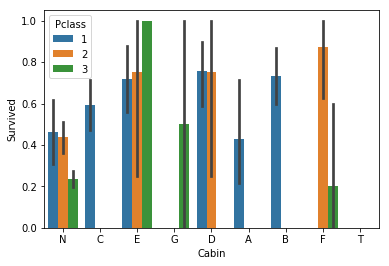

In [151]:
sns.barplot(data=whole_df, x='Cabin',y='Survived',hue='Pclass')

In [152]:
# here we will group cabins based on class
def group_cabin(code):
    if code in ['A','B','C','T']:
        return 'ABCT'
    elif code in ['F','G']:
        return 'FG'
    elif code in ['E','D']:
        return 'DE'
    else:
        return code
    
whole_df['Cabin']=whole_df['Cabin'].apply(group_cabin)

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


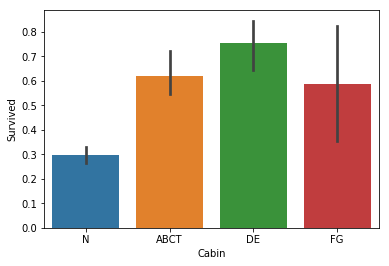

In [153]:
sns.barplot(data=whole_df, x='Cabin', y='Survived')

In [154]:
whole_df['title']=whole_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [155]:
# get title of each person
whole_df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

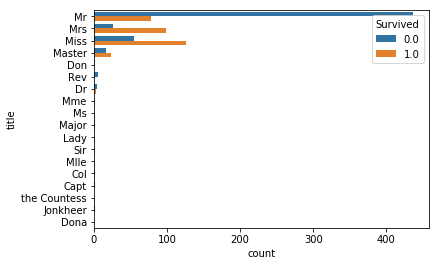

In [156]:
sns.countplot(data=whole_df, y='title', hue='Survived')

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


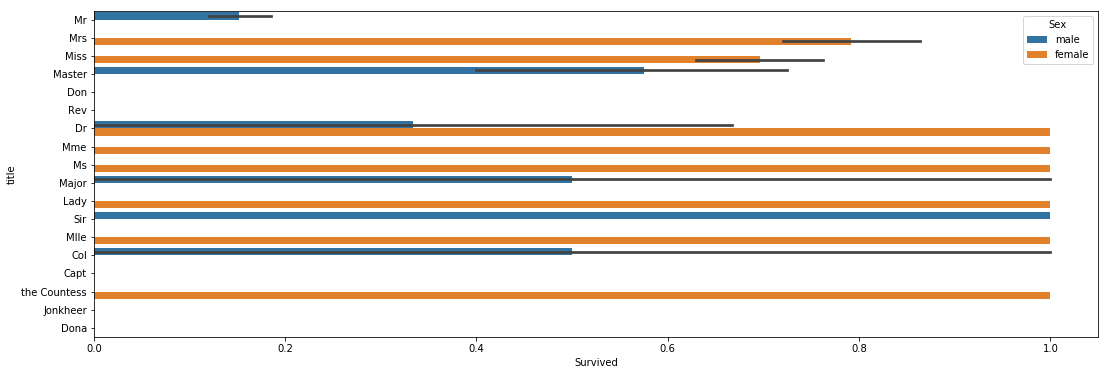

In [157]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
sns.barplot(data=whole_df, y='title',x='Survived', hue='Sex')

In [158]:
# let's merge all female titles together, we will keep Mr & Master separate and group remaining in other
def standardise_names(name):
    if name in ['Mrs','Miss','Ms','Lady','Mlle','the Countess','Dona']:
        return "female_titles"
    elif name in ['Mr','Master']:
        return name
    else:
        return 'others'
whole_df['title']=whole_df['title'].apply(standardise_names)

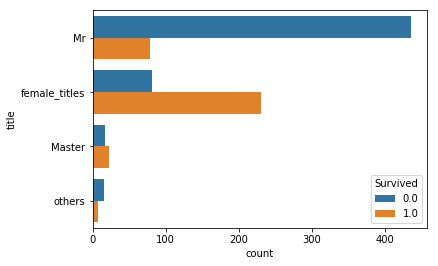

In [159]:
sns.countplot(data=whole_df, y='title',hue='Survived')

In [160]:
# since close friends/family will buy ticket together so we will use tickets to make ticket survival rate
tickets={}
for ticket,df in whole_df.xs(0).groupby('Ticket'):
    if df.shape[0]>1:
        tickets[ticket]=df['Survived'].sum()/df.shape[0]

In [161]:
default=0.5
whole_df['ticket_sr']=whole_df['Ticket']
whole_df['ticket_sr']=whole_df['ticket_sr'].apply(lambda x: tickets[x] if x in tickets.keys() else default)

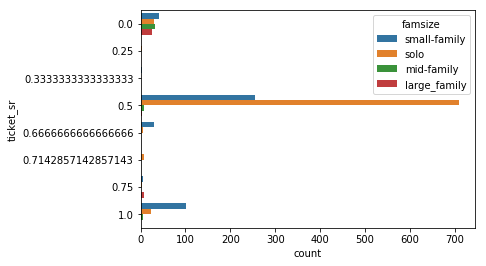

In [162]:
sns.countplot(data=whole_df, hue='famsize', y='ticket_sr', orient='h')

C:\Users\Sindhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


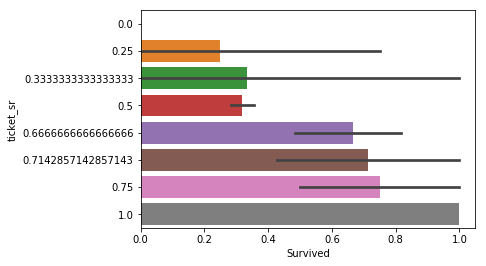

In [163]:
sns.barplot(data=whole_df, y='ticket_sr', x='Survived',orient='h')

In [164]:
# remove unecessary features and dummify
whole_df.drop(labels=['Name','Ticket','SibSp','Parch'], axis=1, inplace=True)
whole_df= pd.get_dummies(whole_df,columns=['Pclass','Sex','Age','Fare','Cabin','Embarked','title','famsize'],drop_first=True)

In [165]:
whole_df.head()

PassengerId  Survived  ticket_sr  Pclass_2  Pclass_3  Sex_male  \
0 0            1       0.0        0.5         0         1         1   
  1            2       1.0        0.5         0         0         0   
  2            3       1.0        0.5         0         1         0   
  3            4       1.0        0.5         0         0         0   
  4            5       0.0        0.5         0         1         1   

     Age_child  Age_infant  Age_senior  Fare_(7.25, 7.75]      ...       \
0 0          0           0           0                  0      ...        
  1          0           0           0                  0      ...        
  2          0           0           0                  0      ...        
  3          0           0           0                  0      ...        
  4          0           0           0                  0      ...        

     Cabin_FG  Cabin_N  Embarked_Q  Embarked_S  title_Mr  title_female_titles  \
0 0         0        1           0           1         1                    0   
  1         0        0           0           0         0                    1   
  2         0        1           0           1         0                    1   
  3         0        0           0           1         0                    1   
  4         0        1           0           1         1                    0   

     title_others  famsize_mid-family  famsize_small-family  famsize_solo  
0 0             0                   0                     1             0  
  1             0                   0                     1             0  
  2             0                   0                     0             1  
  3             0                   0                     1             0  
  4             0                   0                     0             1  

[5 rows x 32 columns]

In [166]:
# look for high correlation features in training set
corr = whole_df.drop('PassengerId', axis=1).corr()
corr = corr[(corr['Survived']>0.1) | (corr['Survived'] < -0.1)]


In [167]:
corr

,Survived,ticket_sr,Pclass_2,Pclass_3,Sex_male,Age_child,Age_infant,Age_senior,"Fare_(7.25, 7.75]","Fare_(7.75, 7.896]",...,Cabin_FG,Cabin_N,Embarked_Q,Embarked_S,title_Mr,title_female_titles,title_others,famsize_mid-family,famsize_small-family,famsize_solo
Survived,1.000000,0.522770,0.096670,-0.318009,-0.547626,0.097519,0.113667,-0.091888,-0.035220,-0.132541,...,0.059632,-0.312789,0.005429,-0.144804,-0.554277,0.542407,-0.020648,-0.094040,0.282380,-0.206238
ticket_sr,0.522770,1.000000,0.031616,-0.255704,-0.147899,-0.033669,0.072494,-0.004523,-0.010905,-0.012926,...,0.078563,-0.277230,-0.035704,-0.124193,-0.134185,0.144656,0.027725,-0.251104,0.231587,-0.048199
Pclass_3,-0.318009,-0.255704,-0.566165,1.000000,0.117669,0.085188,0.007743,-0.084604,0.253975,0.301043,...,-0.012392,0.526521,0.243112,-0.007108,0.119462,-0.114289,-0.158532,0.069889,-0.224638,0.139687
Sex_male,-0.547626,-0.147899,-0.028560,0.117669,1.000000,-0.074825,0.004624,0.043144,-0.036459,0.120131,...,-0.042775,0.141876,-0.088564,0.115470,0.870356,-0.996661,0.085663,-0.062282,-0.256604,0.285910
Age_infant,0.113667,0.072494,0.028524,0.007743,0.004624,-0.026994,1.000000,-0.011068,-0.026686,-0.031632,...,-0.013735,0.032459,-0.031077,0.010281,-0.112694,-0.004320,-0.014003,-0.018621,0.136006,-0.118745
"Fare_(7.75, 7.896]",-0.132541,-0.012926,-0.170440,0.301043,0.120131,-0.082051,-0.031632,-0.014921,-0.090953,1.000000,...,-0.046815,0.176285,0.026810,0.095756,0.160292,-0.119196,-0.047725,-0.063466,-0.205168,0.234678
"Fare_(56.496, 83.158]",0.126182,0.021090,-0.060133,-0.242523,-0.096797,-0.056361,-0.027146,0.097061,-0.078057,-0.092523,...,-0.040177,-0.285384,-0.090901,-0.104588,-0.091917,0.091658,0.041527,-0.054467,0.192459,-0.215345
"Fare_(83.158, 512.329]",0.215854,0.304980,-0.148726,-0.312496,-0.167537,-0.024584,0.002718,0.018130,-0.079366,-0.094075,...,-0.040850,-0.443376,-0.062709,-0.154352,-0.165237,0.168617,0.019350,0.115473,0.152928,-0.175701
Cabin_DE,0.215854,0.130944,-0.063607,-0.272997,-0.070559,-0.051238,-0.025747,0.050572,-0.074033,-0.087754,...,-0.038105,-0.497794,-0.075700,-0.040266,-0.045196,0.065063,-0.017265,-0.051659,0.123311,-0.084554
Cabin_N,-0.312789,-0.277230,0.175275,0.526521,0.141876,0.044280,0.032459,-0.100474,0.112988,0.176285,...,-0.265561,1.000000,0.141728,0.135507,0.136663,-0.136047,-0.076968,-0.004771,-0.212228,0.176985


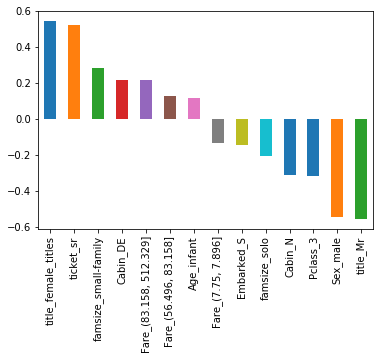

In [168]:
corr['Survived'].sort_values(ascending=False).drop('Survived').plot(kind='bar')

### Machine Learning Models

In [169]:
# prepare for modelling
train, test = whole_df.xs(0),whole_df.xs(1)

In [170]:
y=train['Survived'].astype(int)
X = train.drop(labels=['Survived','PassengerId'],axis=1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [172]:
X_final,IDs = test.drop(labels=['PassengerId','Survived'],axis=1), test['PassengerId']

In [173]:
# import some libraries for Machine Learning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

Get the features with high correlation from correlation table

In [174]:
# getting features of high correlation
thresh = 0.1
corr = train.drop('PassengerId',axis=1).corr()
corr= corr[(corr['Survived']>thresh) | (corr['Survived']< -thresh)].drop('Survived')
selected_features = corr.sort_values('Survived').index
selected_features

Index(['title_Mr', 'Sex_male', 'Pclass_3', 'Cabin_N', 'famsize_solo',
       'Embarked_S', 'Fare_(7.75, 7.896]', 'Age_infant',
       'Fare_(56.496, 83.158]', 'Fare_(83.158, 512.329]', 'Cabin_DE',
       'famsize_small-family', 'ticket_sr', 'title_female_titles'],
      dtype='object')

Test multiple machine learning algorithms on dataset. The goal is to find best model, value test accuracy over train accuracy and if test acc is way higher than train acc this means overfitting

In [175]:
# make visualizations of score of different models
def make_benchmark(X,y, scoring='accuracy',cv=5):
    folds = StratifiedKFold(n_splits=cv)
    models = [SVC(gamma='auto'),
              DecisionTreeClassifier(),
              KNeighborsClassifier(),
              ExtraTreeClassifier(),
              LogisticRegression(max_iter=10000,solver='lbfgs'),
               RidgeClassifier(),
              AdaBoostClassifier(),
              BaggingClassifier(),
              RandomForestClassifier()]
    names=['SVM',
          'Decision Tree',
          'KNN',
           'Extra Trees',
          'Logistic Regression',
          'Ridge classifier',
          'AdaBoost',
          'Bagging Classifier',
          'Random Forest']
    scores= [np.mean(cross_val_score(model,X,y,cv=folds,scoring=scoring)) 
             for model in models]
    
    return pd.DataFrame({'model_name':names,
                        'model':models,
                        scoring+'_score':scores})
    

In [176]:
folds = StratifiedKFold(n_splits=5)

Text(0.5,1,'Models Score Benchmark')

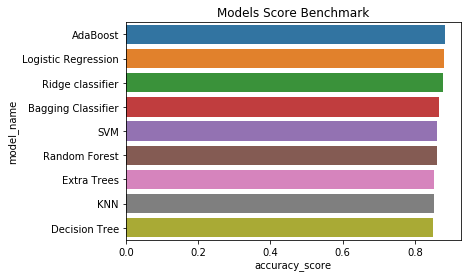

In [177]:
bench = make_benchmark(X,y,cv=5)
sns.barplot(x='accuracy_score',y='model_name',data=bench.sort_values('accuracy_score',ascending=False)).set_title("Models Score Benchmark")

Text(0.5,1,'Models Score Benchmark')

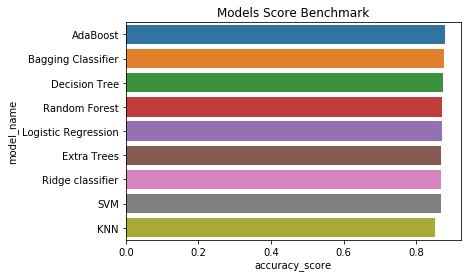

In [178]:
# do benchmark for selected features now that had corr > 0.1
bench = make_benchmark(X[selected_features],y,cv=5)
sns.barplot(x='accuracy_score',y='model_name',data=bench.sort_values('accuracy_score',ascending=False)).set_title("Models Score Benchmark")

Best model seems to be RANDOM FOREST, lets optimize this model 

In [70]:
# optimize our model now 
rf=RandomForestClassifier(random_state=24)
params = {'criterion': ['gini','entropy'],
            'max_features':['auto'],
            'n_estimators':[150,200,300],
            'max_depth':[3,5,7,10,14],
            'class_weight':['balanced','balanced_subsample'],
            'min_samples_split':[20,15,10]}
            
gsrf = GridSearchCV (rf, params,cv=KFold(5),verbose=2)
gsrf.fit(X,y)
gsrf.best_estimator_ 

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_

[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_

[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   1.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   1.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   1.3s
[CV] class_weight=balanced, criterion=gini, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_

[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300, total=   1.6s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=150, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=150, total=   0.8s
[CV] class_weight=balanced, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_

[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]

[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.1s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]

[CV]  class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200, total=   0.9s
[CV] class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300, total=   1.4s
[CV] class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300, total=   1.4s
[CV] class_weight=balanced, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]

[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300, total=   1.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300, total=   1.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300, total=   1.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300, total=   1.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=15, n_esti

[CV]  class_weight=balanced, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300, total=   1.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150, total=   0.6s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=20, n_esti

[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.0s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.0s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, n_esti

[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=15, n_esti

[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.6s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.5s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20

[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=20

[CV]  class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300, total=   2.3s
[CV] class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.1s
[CV] class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.2s
[CV] class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.4s
[CV] class_weight=balanced, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150, total=   0.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=3, max_features=auto, min_samples_split=15, n_estimators=150, total=   1.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150, total=   1.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=150, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   2.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gin

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.9s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=200, total=   2.0s
[CV] class_weight=balanced_subsample, criterion=gin

[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200, total=   1.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=200, total=   2.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=300, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=gin

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=200, total=   1.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.4s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=200, total=   1.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=3, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   2.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=15, n_estimators=300, total=   2.9s
[CV] class_weight=balanced_subsample,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=20, n_estimators=300, total=   2.9s
[CV] class_weight=balanced_subsample,

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_subsampl

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=300, total=   3.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=300, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=300, total=   2.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.6s
[CV] class_weight=balanced_sub

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=20, n_estimators=300, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=20, n_estimators=300, total=   3.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=20, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=20, n_estimators=300, total=   3.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=15, n_estimators=150, total=   1.4s
[CV] class_weight=balanced_sub

[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=300, total=   3.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=300, total=   2.6s
[CV] class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, n_estimators=300, total=   3.1s


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 28.0min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

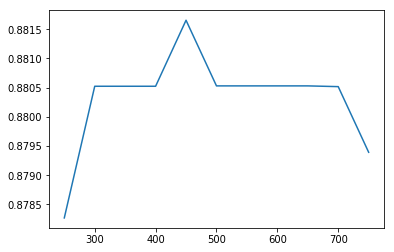

In [72]:
# different numbers of estimators effect on random forest
folds = StratifiedKFold(n_splits=5)
x_axis, y_axis = [],[]
for i in range(250,800,50):
    rf = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                           criterion='entropy', max_depth=7, max_features='auto',
                           max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=i,
                           n_jobs=1, oob_score=False, random_state=24, verbose=0,
                           warm_start=False)
    
    y_axis.append(np.mean(cross_val_score(rf, X, y, cv=folds,scoring='accuracy')))
    x_axis.append(i)

sns.lineplot(x=x_axis, y=y_axis)

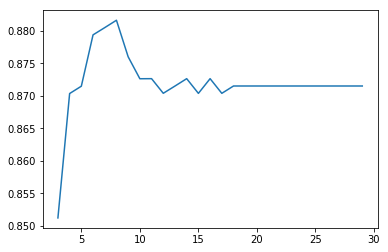

In [73]:
#effect of  different depth on RandomForest

folds = StratifiedKFold(n_splits=5)
x_axis, y_axis = [],[]
for i in range(3,30,1):
    #our model
    rf = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                           criterion='entropy', max_depth=i, max_features='auto',
                           max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_jobs=1, oob_score=False, random_state=24, verbose=0,
                           warm_start=False)
    # add score for plotting
    y_axis.append(np.mean(cross_val_score(rf, X, y, cv=folds,scoring='accuracy')))
    x_axis.append(i)

sns.lineplot(x=x_axis, y=y_axis)

In [75]:
# finalizing our random forest 
rf = RandomForestClassifier(bootstrap=True,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=9, max_features=0.2, min_samples_leaf=4,
                       min_samples_split=15,n_estimators=700,
                       random_state=24, verbose=0)

In [76]:
np.mean(cross_val_score(rf,X,y,cv=folds,scoring='accuracy'))

0.8748923004564787

In [77]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=9, max_features=0.2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=1, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

In [78]:
y_hat=rf.predict(X_final)

In [80]:
final_predictions = pd.DataFrame ({"PassengerId" : IDs,
                                  "Survived": y_hat})
final_predictions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


reference: https://www.kaggle.com/baghlafturki/titanic-survivors-prediction/notebook

End